In [2]:
# ! pip install --upgrade outlier-cleaner

In [3]:
# ! pip install catboost

In [4]:
# ! pip install lightgbm

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder, OneHotEncoder
from outlier_cleaner import OutlierCleaner
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer

# modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix,precision_score,roc_curve,roc_auc_score,r2_score,mean_squared_error
from sklearn.pipeline import Pipeline


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv('./imdb_data.csv')
df

,Title,Title_URL,Image,listeritemimage_URL,listeritemindex,Year,certificate,Time,genre,Rating,Score,Synopsis,Content,Director,Content4,Content6,Content8,Content10,Votes,Gross
0,Avatar: The Way of Water,https://www.imdb.com/title/tt1630029/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BYjhiNj...,https://www.imdb.com/title/tt1630029/?ref_=adv...,1.,(2022),12A,192 min,"\nAction, Adventure, Fantasy",7.8,\n67 \n Metascore\n,\nJake Sully lives with his newfound family fo...,\n Director:\nJames Cameron\n ...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,"280,707",NaN
1,The Menu,https://www.imdb.com/title/tt9764362/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BMzdjNj...,https://www.imdb.com/title/tt9764362/?ref_=adv...,2.,(2022),15,107 min,"\nHorror, Thriller",7.2,\n71 \n Metascore\n,\nA young couple travels to a remote island to...,\n Director:\nMark Mylod\n ...,Mark Mylod,Ralph Fiennes,Anya Taylor-Joy,Nicholas Hoult,Hong Chau,"211,749",NaN
2,Babylon,https://www.imdb.com/title/tt10640346/?ref_=ad...,https://m.media-amazon.com/images/M/MV5BNjlkYj...,https://www.imdb.com/title/tt10640346/?ref_=ad...,3.,(I) (2022),18,189 min,"\nComedy, Drama, History",7.5,\n60 \n Metascore\n,\nA tale of outsized ambition and outrageous e...,\n Director:\nDamien Chazelle\n ...,Damien Chazelle,Brad Pitt,Margot Robbie,Jean Smart,Olivia Wilde,"47,754",NaN
3,Everything Everywhere All at Once,https://www.imdb.com/title/tt6710474/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt6710474/?ref_=adv...,4.,(2022),15,139 min,"\nAction, Adventure, Comedy",8.0,\n81 \n Metascore\n,\nA middle-aged Chinese immigrant is swept up ...,"\n Directors:\nDan Kwan, \nDaniel Scheinert...",Dan Kwan,Daniel Scheinert,Michelle Yeoh,Stephanie Hsu,Jamie Lee Curtis,"315,971",NaN
4,M3gan,https://www.imdb.com/title/tt8760708/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt8760708/?ref_=adv...,5.,(2022),15,102 min,"\nHorror, Sci-Fi, Thriller",6.4,\n72 \n Metascore\n,\nA robotics engineer at a toy company builds ...,\n Director:\nGerard Johnstone\n ...,Gerard Johnstone,Allison Williams,Violet McGraw,Ronny Chieng,Amie Donald,"52,436",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79989,Nanga Parbat,https://www.imdb.com/title/tt1361349/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt1361349/?ref_=adv...,"39,996.",(2010),NaN,104 min,"\nBiography, Drama",6.4,NaN,\nDrama about the tragic Nanga Parbat expediti...,\n Director:\nJoseph Vilsmaier\n ...,Joseph Vilsmaier,Florian Stetter,Andreas Tobias,Karl Markovics,Steffen Schroeder,"1,876",NaN
79990,When Men Carried Clubs and Women Played Ding-Dong,https://www.imdb.com/title/tt0067638/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt0067638/?ref_=adv...,"39,997.",(1971),NaN,95 min,\nComedy,4.1,NaN,\nPrehistoric cave-stud Ari wins lovely virgin...,\n Director:\nBruno Corbucci\n ...,Bruno Corbucci,Antonio Sabato,Aldo Giuffrè,Vittorio Caprioli,Nadia Cassini,177,NaN
79991,The Bacon Hair,https://www.imdb.com/title/tt13634096/?ref_=ad...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt13634096/?ref_=ad...,"39,998.",(2020),NaN,76 min,"\nAnimation, Action, Adventure",8.0,NaN,\nSurrounded by towering walls and patrolled b...,\n Director:\nObliviousHD\n ...,ObliviousHD,Leah Ashley,Tom Aglio,Gen Sherard,Graham Rowat,119,NaN
79992,Alexander the Great,https://www.imdb.com/title/tt0081148/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt0081148/?ref_=adv...,"39,999.",(1980),12,210 min,"\nDrama, History",7.5,NaN,\nA rebel leader calling himself Alexander the...,\n Director:\nTheodoros Angelopoulos\n ...,Theodoros Angelopoulos,Omero Antonutti,Eva Kotamanidou,Mihalis Giannatos,Grigoris Evangelatos,"1,051",NaN


In [7]:
df.head()

,Title,Title_URL,Image,listeritemimage_URL,listeritemindex,Year,certificate,Time,genre,Rating,Score,Synopsis,Content,Director,Content4,Content6,Content8,Content10,Votes,Gross
0,Avatar: The Way of Water,https://www.imdb.com/title/tt1630029/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BYjhiNj...,https://www.imdb.com/title/tt1630029/?ref_=adv...,1.,(2022),12A,192 min,"\nAction, Adventure, Fantasy",7.8,\n67 \n Metascore\n,\nJake Sully lives with his newfound family fo...,\n Director:\nJames Cameron\n ...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,"280,707",NaN
1,The Menu,https://www.imdb.com/title/tt9764362/?ref_=adv...,https://m.media-amazon.com/images/M/MV5BMzdjNj...,https://www.imdb.com/title/tt9764362/?ref_=adv...,2.,(2022),15,107 min,"\nHorror, Thriller",7.2,\n71 \n Metascore\n,\nA young couple travels to a remote island to...,\n Director:\nMark Mylod\n ...,Mark Mylod,Ralph Fiennes,Anya Taylor-Joy,Nicholas Hoult,Hong Chau,"211,749",NaN
2,Babylon,https://www.imdb.com/title/tt10640346/?ref_=ad...,https://m.media-amazon.com/images/M/MV5BNjlkYj...,https://www.imdb.com/title/tt10640346/?ref_=ad...,3.,(I) (2022),18,189 min,"\nComedy, Drama, History",7.5,\n60 \n Metascore\n,\nA tale of outsized ambition and outrageous e...,\n Director:\nDamien Chazelle\n ...,Damien Chazelle,Brad Pitt,Margot Robbie,Jean Smart,Olivia Wilde,"47,754",NaN
3,Everything Everywhere All at Once,https://www.imdb.com/title/tt6710474/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt6710474/?ref_=adv...,4.,(2022),15,139 min,"\nAction, Adventure, Comedy",8.0,\n81 \n Metascore\n,\nA middle-aged Chinese immigrant is swept up ...,"\n Directors:\nDan Kwan, \nDaniel Scheinert...",Dan Kwan,Daniel Scheinert,Michelle Yeoh,Stephanie Hsu,Jamie Lee Curtis,"315,971",NaN
4,M3gan,https://www.imdb.com/title/tt8760708/?ref_=adv...,https://m.media-amazon.com/images/S/sash/4Fyxw...,https://www.imdb.com/title/tt8760708/?ref_=adv...,5.,(2022),15,102 min,"\nHorror, Sci-Fi, Thriller",6.4,\n72 \n Metascore\n,\nA robotics engineer at a toy company builds ...,\n Director:\nGerard Johnstone\n ...,Gerard Johnstone,Allison Williams,Violet McGraw,Ronny Chieng,Amie Donald,"52,436",NaN


## Duplicate

In [9]:
df.duplicated().sum()

39996

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

## Missing Value

In [13]:
df.isna().sum()

Title                      0
Title_URL                  0
Image                      0
listeritemimage_URL        0
listeritemindex            0
Year                    1342
certificate            12630
Time                    2579
genre                    204
Rating                  2620
Score                  26576
Synopsis                   0
Content                    1
Director                 116
Content4                 419
Content6                 707
Content8                 966
Content10               1262
Votes                   2620
Gross                  27804
dtype: int64

In [14]:
cols_to_drop = ['Title_URL', 'Image', 'listeritemimage_URL', 'listeritemindex', 'Score', 'Content']
df = df.drop(columns=cols_to_drop)

In [15]:
df['certificate'] = df['certificate'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Votes'] = df['Votes'].fillna('0')
df['Gross'] = df['Gross'].fillna('0')

In [16]:
df['Rating'] = df['Rating'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39998 entries, 0 to 39997
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        39998 non-null  object
 1   Year         38656 non-null  object
 2   certificate  39998 non-null  object
 3   Time         37419 non-null  object
 4   genre        39998 non-null  object
 5   Rating       39998 non-null  int32 
 6   Synopsis     39998 non-null  object
 7   Director     39882 non-null  object
 8   Content4     39579 non-null  object
 9   Content6     39291 non-null  object
 10  Content8     39032 non-null  object
 11  Content10    38736 non-null  object
 12  Votes        39998 non-null  object
 13  Gross        39998 non-null  object
dtypes: int32(1), object(13)
memory usage: 4.4+ MB


In [18]:
df['genre'].unique()

array(['\nAction, Adventure, Fantasy            ',
       '\nHorror, Thriller            ',
       '\nComedy, Drama, History            ',
       '\nAction, Adventure, Comedy            ',
       '\nHorror, Sci-Fi, Thriller            ',
       '\nComedy, Drama            ',
       '\nAction, Drama, Thriller            ',
       '\nComedy, Romance            ',
       '\nAction, Drama, Fantasy            ',
       '\nAnimation, Adventure, Comedy            ',
       '\nCrime, Horror, Mystery            ',
       '\nComedy, Crime, Drama            ', '\nDrama            ',
       '\nDrama, Music            ',
       '\nAction, Comedy, Romance            ',
       '\nAction, Drama, War            ', '\nAction, Drama            ',
       '\nDrama, History, War            ',
       '\nHorror, Mystery, Thriller            ',
       '\nAction, Adventure, Drama            ',
       '\nAction, Thriller            ',
       '\nAction, Drama, History            ',
       '\nAction, Comedy, Thril

In [19]:
df['genre'] = df['genre'].str.strip()

In [20]:
df['genre_list'] = df['genre'].str.split(', ')

In [21]:
df['genre'].unique()

array(['Action, Adventure, Fantasy', 'Horror, Thriller',
       'Comedy, Drama, History', 'Action, Adventure, Comedy',
       'Horror, Sci-Fi, Thriller', 'Comedy, Drama',
       'Action, Drama, Thriller', 'Comedy, Romance',
       'Action, Drama, Fantasy', 'Animation, Adventure, Comedy',
       'Crime, Horror, Mystery', 'Comedy, Crime, Drama', 'Drama',
       'Drama, Music', 'Action, Comedy, Romance', 'Action, Drama, War',
       'Action, Drama', 'Drama, History, War',
       'Horror, Mystery, Thriller', 'Action, Adventure, Drama',
       'Action, Thriller', 'Action, Drama, History',
       'Action, Comedy, Thriller', 'Biography, Drama, Music',
       'Biography, Comedy, Drama', 'Comedy, Mystery, Thriller',
       'Comedy, Drama, Sport', 'Drama, Thriller',
       'Crime, Drama, Thriller', 'Action, Comedy, Crime',
       'Action, Crime, Drama', 'Adventure, Drama, Sci-Fi',
       'Biography, Drama, Romance', 'Animation, Drama, Family',
       'Crime, Drama, History', 'Horror', 'Crime, Dr

In [22]:
df.head(2)

,Title,Year,certificate,Time,genre,Rating,Synopsis,Director,Content4,Content6,Content8,Content10,Votes,Gross,genre_list
0,Avatar: The Way of Water,(2022),12A,192 min,"Action, Adventure, Fantasy",7,\nJake Sully lives with his newfound family fo...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,"280,707",0,"[Action, Adventure, Fantasy]"
1,The Menu,(2022),15,107 min,"Horror, Thriller",7,\nA young couple travels to a remote island to...,Mark Mylod,Ralph Fiennes,Anya Taylor-Joy,Nicholas Hoult,Hong Chau,"211,749",0,"[Horror, Thriller]"


In [23]:
df.isna().sum()

Title             0
Year           1342
certificate       0
Time           2579
genre             0
Rating            0
Synopsis          0
Director        116
Content4        419
Content6        707
Content8        966
Content10      1262
Votes             0
Gross             0
genre_list        0
dtype: int64

In [24]:
df['Content4'] = df['Content4'].fillna('Unknown')
df['Content6'] = df['Content6'].fillna('Unknown')

In [25]:
# df['Content4'] = df['Content4'].astype(float)
# df['Content6'] = df['Content6'].astype(float)

In [26]:
cols_to_drop = ['Content8','Content10','Director']
df = df.drop(columns=cols_to_drop)

In [27]:
df.head(2)

,Title,Year,certificate,Time,genre,Rating,Synopsis,Content4,Content6,Votes,Gross,genre_list
0,Avatar: The Way of Water,(2022),12A,192 min,"Action, Adventure, Fantasy",7,\nJake Sully lives with his newfound family fo...,Sam Worthington,Zoe Saldana,"280,707",0,"[Action, Adventure, Fantasy]"
1,The Menu,(2022),15,107 min,"Horror, Thriller",7,\nA young couple travels to a remote island to...,Ralph Fiennes,Anya Taylor-Joy,"211,749",0,"[Horror, Thriller]"


In [28]:
df.isna().sum()

Title             0
Year           1342
certificate       0
Time           2579
genre             0
Rating            0
Synopsis          0
Content4          0
Content6          0
Votes             0
Gross             0
genre_list        0
dtype: int64

In [29]:
df['Time'] = df['Time'].str.strip()

In [30]:
df['Time'] = df['Time'].str.replace(r'\s*min\s*','',regex=True)

In [31]:
df['Time'].unique()

array(['192', '107', '189', '139', '102', '114', '146', '117', '140',
       '128', '147', '151', '158', '100', '148', '126', '134', '130',
       '108', '104', '105', '98', '129', '127', '159', '123', '162',
       '125', '119', '173', '109', '111', '187', '161', '106', '112',
       '176', '167', '124', nan, '175', '103', '137', '83', '136', '169',
       '115', '142', '94', '92', '195', '152', '110', '84', '155', '194',
       '180', '135', '88', '154', '131', '101', '90', '97', '138', '120',
       '118', '95', '96', '132', '113', '153', '93', '181', '150', '170',
       '178', '122', '164', '116', '144', '121', '86', '145', '163', '89',
       '99', '165', '91', '149', '133', '202', '157', '201', '179', '156',
       '80', '143', '160', '168', '209', '79', '87', '85', '141', '242',
       '229', '172', '81', '183', '218', '238', '166', '210', '188', '82',
       '71', '207', '78', '185', '70', '76', '212', '77', '193', '220',
       '75', '50', '191', '197', '174', '73', '259', '1

In [32]:
df['Time'] = df['Time'].str.replace(',','')

In [62]:
df['Time'] = df['Time'].astype(int)

In [64]:
df['Time'] = df['Time'].fillna(df['Rating'].median())

In [66]:
df['Time'] = df['Time'].replace('0',df['Time'].mean())

In [68]:
df['Time'].unique()

array([ 192,  107,  189,  139,  102,  114,  146,  117,  140,  128,  147,
        151,  158,  100,  148,  126,  134,  130,  108,  104,  105,   98,
        129,  127,  159,  123,  162,  125,  119,  173,  109,  111,  187,
        161,  106,  112,  176,  167,  124,    6,  175,  103,  137,   83,
        136,  169,  115,  142,   94,   92,  195,  152,  110,   84,  155,
        194,  180,  135,   88,  154,  131,  101,   90,   97,  138,  120,
        118,   95,   96,  132,  113,  153,   93,  181,  150,  170,  178,
        122,  164,  116,  144,  121,   86,  145,  163,   89,   99,  165,
         91,  149,  133,  202,  157,  201,  179,  156,   80,  143,  160,
        168,  209,   79,   87,   85,  141,  242,  229,  172,   81,  183,
        218,  238,  166,  210,  188,   82,   71,  207,   78,  185,   70,
         76,  212,   77,  193,  220,   75,   50,  191,  197,  174,   73,
        259,  171,   74,  182,   57,  177,  219,   69,   64,   72,   59,
         58,  247,  321,  317,   60,   63,  186,  1

In [70]:
df['Time'].info()

<class 'pandas.core.series.Series'>
Index: 39998 entries, 0 to 39997
Series name: Time
Non-Null Count  Dtype
--------------  -----
39998 non-null  int32
dtypes: int32(1)
memory usage: 468.7 KB


In [72]:
df.Time.describe()

count    39998.000000
mean        97.028676
std         32.525404
min          6.000000
25%         88.000000
50%         98.000000
75%        110.000000
max       1260.000000
Name: Time, dtype: float64

<Axes: ylabel='Time'>

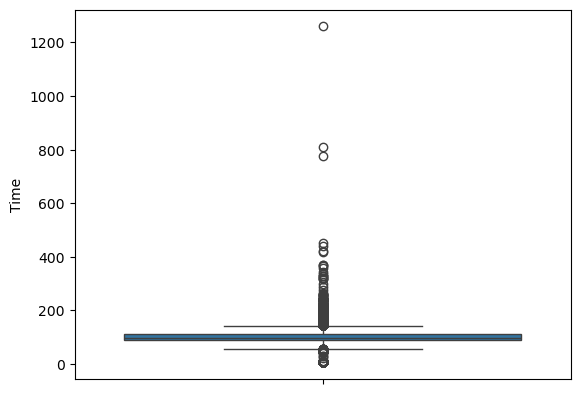

In [74]:
sns.boxplot(df['Time'])

<Axes: ylabel='Frequency'>

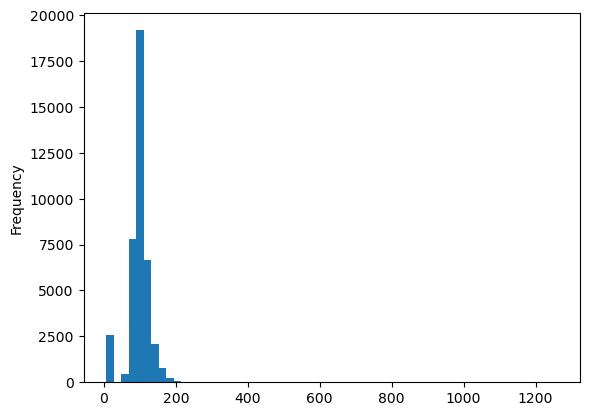

In [75]:
df['Time'].plot(kind='hist',bins=60)

In [77]:
df['Time'].describe()

count    39998.000000
mean        97.028676
std         32.525404
min          6.000000
25%         88.000000
50%         98.000000
75%        110.000000
max       1260.000000
Name: Time, dtype: float64

In [80]:
df['Time'].unique()

array([ 192,  107,  189,  139,  102,  114,  146,  117,  140,  128,  147,
        151,  158,  100,  148,  126,  134,  130,  108,  104,  105,   98,
        129,  127,  159,  123,  162,  125,  119,  173,  109,  111,  187,
        161,  106,  112,  176,  167,  124,    6,  175,  103,  137,   83,
        136,  169,  115,  142,   94,   92,  195,  152,  110,   84,  155,
        194,  180,  135,   88,  154,  131,  101,   90,   97,  138,  120,
        118,   95,   96,  132,  113,  153,   93,  181,  150,  170,  178,
        122,  164,  116,  144,  121,   86,  145,  163,   89,   99,  165,
         91,  149,  133,  202,  157,  201,  179,  156,   80,  143,  160,
        168,  209,   79,   87,   85,  141,  242,  229,  172,   81,  183,
        218,  238,  166,  210,  188,   82,   71,  207,   78,  185,   70,
         76,  212,   77,  193,  220,   75,   50,  191,  197,  174,   73,
        259,  171,   74,  182,   57,  177,  219,   69,   64,   72,   59,
         58,  247,  321,  317,   60,   63,  186,  1

In [82]:
# df['Director']=df['Director'].str.split() 

In [84]:
# missing_dir_df = df[df['Director'].isna()==True][['Title','Director']]

In [86]:
# missing_dir_df

In [88]:
# df['Director'] = df['Director'].replace('Unknown','NaN')

In [90]:
# # movie_directors_map = {
#     "Gremlins 3": "Unknown", # Was: No Director Attached / Development Hell
#     "Untitled Shrek Reboot": "Unknown", # Was: No Director Announced / Uncertain Status
#     "Django/Zorro": "Unknown", # Was: No Director Attached / Film Adaptation Stalled/Unlikely
#     "Karate Kid": "Jonathan Entwistle (Upcoming film starring Ralph Macchio and Jackie Chan)", # Keep: Confirmed director
#     "The Hunchback of Notre Dame": "Unknown", # Was: No Director Currently Attached (Live-Action)
#     "The Conjuring 4": "Michael Chaves (Tentatively titled 'The Conjuring: Last Rites')", # Keep: Confirmed director
#     "The Seven Husbands of Evelyn Hugo": "Unknown", # Was: Leslye Headland (was attached) -> No longer attached = Unknown
#     "The Modern Ocean": "Unknown", # Was: Shane Carruth (project stalled) -> Stalled = Unknown
#     "Mistborn: The Final Empire": "Unknown", # Was: No Director Announced
#     "Twisters": "Lee Isaac Chung (2024 film)", # Keep: Confirmed director
#     "Star Wars: A Droid Story": "Unknown", # Was: No Director Named / Uncertain Status
#     "Thanksgiving": "Eli Roth (2023 film)", # Keep: Confirmed director
#     "Real Steel 2": "Unknown", # Was: No Director Attached / Not Greenlit
#     "Girl Who Fell from the Sky": "Ambiguous: Hayao Miyazaki (Castle in the Sky) / Novel Adaptation Unknown", # Keep Miyazaki, specify other unknown
#     "Justice League Part Two": "Unknown", # Was: Zack Snyder (originally planned, project cancelled) -> Cancelled = Unknown
#     "Detective Pikachu 2": "Unknown", # Was: Jonathan Krisel (was in talks, status uncertain) -> Uncertain = Unknown
#     "Zootopia 2: Rise of the Non-Mammalians": "Unknown", # Was: No Director Officially Confirmed Yet
#     "The Silent Patient": "Unknown", # Was: No Director Announced Yet
#     "The Kidnapping of Edgardo Mortara": "Unknown", # Was: Steven Spielberg's version unlikely / No Director Attached
#     "300: The Resurgence": "Unknown", # Was: No Official Project / No Director
#     "Superman: Legacy": "James Gunn (Film now titled 'Superman')", # Keep: Confirmed director
#     "Halo": "Unknown", # Was: TV Series / Various Directors -> TV Series has no single film director
#     "Fools Gold": "Andy Tennant (2008 film)", # Keep: Confirmed director (existing film)
#     "Hot Wheels": "Unknown", # Was: No Director Currently Attached
#     "Alphas": "Unknown", # Was: TV Series / Various Directors -> TV Series has no single film director
#     "Untitled Universal Event Film": "Unknown", # Was: Unknown / Placeholder Title
#     "The Crooked Man": "Unknown", # Was: No Director Attached / Stalled or Cancelled
#     "It Takes Two": "Unknown", # Was: No Director Officially Confirmed (Rawson Marshall Thurber potentially involved)
#     "Wildcat": "Ethan Hawke (2023 film)", # Keep: Confirmed director
#     "Rambo: New Blood": "Unknown", # Was: No Director Attached / Unconfirmed Project
#     "My Year of Rest and Relaxation": "Unknown", # Was: No Confirmed Director (Yorgos Lanthimos potentially involved)
#     "The Chef": "Ambiguous: Jon Favreau (Chef), Mark Mylod (The Menu), John Wells (Burnt)", # Keep: Directors for possible interpretations
#     "Memento": "Christopher Nolan (2000 film) / Remake Unknown", # Keep Nolan, specify remake unknown
#     "Ashoka": "Unknown", # Was: TV Series / Dave Filoni & Various Directors -> TV Series has no single film director
#     "Untitled Universal Animated Event Film": "Unknown", # Was: Unknown / Placeholder Title
#     "Assassin's Creed 2": "Unknown", # Was: No Director Attached / Sequel Not Materialized
#     "The Karate Kid 2": "John G. Avildsen (1986 film)", # Keep: Confirmed director (existing film)
#     "The Long Walk": "André Øvredal (attached)", # Keep: Confirmed director
#     "Pretty Boy": "Ambiguous: Marcel Sarmiento (2021 film) / Cameron Van Hoy (2015 film)", # Keep: Directors for possible interpretations
#     "The Chronicles of Narnia: The Magician's Nephew": "Greta Gerwig (attached for two Narnia films)", # Keep: Confirmed director
#     "Flanimals": "Unknown", # Was: No Director Attached / Inactive Project
#     "Green Lantern Corps": "Unknown", # Was: No Film Director Attached / Reworked as TV series
#     "Dodgeball 2": "Unknown", # Was: No Director Officially Announced
#     "Marseilles": "Unknown", # Was: Ambiguous: Likely TV Series (Marseille) / Various Directors
#     "Gears of War": "Unknown", # Was: No Director Announced Yet (Netflix film)
#     "The Smurfs: Amazing Adventures": "Chris Miller (Upcoming 'The Smurfs Movie')", # Keep: Confirmed director
#     "A Head Full of Ghosts": "Unknown", # Was: Scott Cooper (most recently attached, status unclear) -> Uncertain = Unknown
#     "Zatanna": "Unknown", # Was: No Current Director / Project Stalled or Cancelled
#     "The Norsemen": "Unknown", # Was: TV Series / Jon Iver Helgaker & Jonas Torgersen -> TV Series has no single film director
#     "Friday the 13th": "Franchise: Sean S. Cunningham (original) / Current Unknown", # Keep context, specify current unknown
#     "Bright 2": "Unknown", # Was: Louis Leterrier (was attached before cancellation) -> Cancelled = Unknown
#     "Terminator 7: Future Resistance": "Unknown", # Was: No Official Project / No Director / Likely Fan Title
#     "The Heat 2": "Unknown", # Was: No Director Attached / Sequel Not Announced
#     "Bond 26": "Unknown", # Was: No Director Announced Yet
#     "Need for Speed 2": "Unknown", # Was: No Director Attached / Sequel Not Announced
#     "Captain Planet": "Unknown", # Was: No Director Attached / Stalled Project
#     "Son's Girlfriend, Daddy's Girlfriend": "Unknown", # Was: Adult Film / Director Unknown
#     "McClane": "Unknown", # Was: Len Wiseman (was attached before cancellation) -> Cancelled = Unknown
#     "Untitled I Am Legend Reboot": "Unknown", # Was: No Director Announced Yet (Sequel)
#     "Remarkable Shades of Gay": "Unknown", # Was: No Information Found
#     "Atari": "Unknown", # Was: No Current Director Attached for Biopic
#     "Rothchild": "Unknown", # Was: Jon S. Baird (was attached, status unclear) -> Uncertain = Unknown
#     "Soul Land": "Various Adaptations: e.g., Yang Zhenyu (2021 TV Series Director) / Film Unknown", # Clarify film director unknown
#     "Justice League Dark": "Unknown", # Was: No Current Director / Stalled Project
#     "Dead Space": "Unknown", # Was: No Official Director Announced
#     "Lucy 2": "Unknown", # Was: No Director Attached / Stalled Project
#     "Marriage Killer": "Unknown", # Was: No Information Found
#     "Half-Life": "Unknown", # Was: No Director Announced / Development Unclear
#     "The Machine": "Peter Atencio (2023 film)", # Keep: Confirmed director
#     "Pocket Girl": "Unknown", # Was: No Information Found
#     "Gotham City Sirens": "Unknown", # Was: David Ayer (was attached before cancellation) -> Cancelled = Unknown
#     "The Sinister Six": "Unknown", # Was: Drew Goddard (was attached to cancelled project) -> Cancelled = Unknown
#     "The Conquest: William the Conqueror": "Unknown", # Was: No Widely Known Project
#     "Untitled Animated Spongebob Squarepants Film": "Derek Drymon ('The SpongeBob Movie: Search for SquarePants')", # Keep: Confirmed director
#     "I Don't Like Younger Men 4": "Unknown", # Was: Adult Film / Director Unknown
#     "Invited Delivery Man": "Unknown", # Was: Adult Film / Director Unknown
#     "The Boxx": "Unknown", # Was: No Information Found
#     "Causeway": "Lila Neugebauer (2022 film)", # Keep: Confirmed director
#     "Flash Gordon": "Unknown", # Was: Taika Waititi (was involved, status/role unclear) / No Confirmed Director -> Unconfirmed = Unknown
#     "The Power of the Dark Crystal": "Unknown", # Was: No Director Attached / Inactive (Genndy Tartakovsky previously attached)
#     "Köksüz": "Deniz Akçay Katıksız (2013 film 'Nobody's Home')", # Keep: Confirmed director (existing film)
#     "UEFA Champions League Final": "Unknown", # Was: Live Sporting Event / TV Broadcast Directors -> Not a film director
#     "Take My Hand": "Ambiguous: Alexandre Carrière (2011 film) / Novel Adaptation Unknown", # Keep Carrière, specify other unknown
#     "Bushwood": "Unknown / Not a Film Title (Refers to Caddyshack, dir. Harold Ramis)", # Clarify
#     "Wednesday": "Unknown", # Was: TV Series / Tim Burton & Various Directors -> TV Series has no single film director
#     "B'Twixt Now and Sunrise": "Francis Ford Coppola (2011 film 'Twixt')", # Keep: Confirmed director (existing film)
#     "Space Jews": "Unknown / Not a Standalone Film (Segment Director Mel Brooks)", # Clarify
#     "Be More Chill": "Unknown", # Was: No Director Officially Attached / Status Uncertain
#     "\ufeffSex Plate 17": "Unknown", # Was: Adult Film / Director Unknown (Note: Key includes BOM character U+FEFF from original list)
#     "Anything, Anywhere, Anytime": "Unknown", # Was: No Information Found
#     "Taming the Younger Sister-in-Law": "Unknown", # Was: Adult Film / Director Unknown
#     "Jeruzalem 2": "Unknown", # Was: No Director Announced / Not Confirmed (Original: Doron Paz, Yoav Paz)
#     "Hancock 2": "Unknown", # Was: No Director Currently Attached / Development Hell
#     "Metropolis": "Fritz Lang (1927 film) / TV Series Unknown", # Specify TV series unknown, keep Lang
#     "Fletch Won": "Unknown", # Was: No Director Attached / Not Greenlit (Greg Mottola interested)
#     "Untitled VeggieTales Project": "Unknown", # Was: Various Directors / Need Specifics
#     "The Belgariad": "Unknown", # Was: No Director Announced / TV Development Status Uncertain
#     "Evrat Jeevrat": "Kartavya Shah (2022 film)", # Keep: Confirmed director
#     "Malavputi Munj": "Unknown", # Was: No Information Found
#     "Maniac Cop": "William Lustig (1988 film) / Series Stalled/Unknown", # Keep Lustig, specify series unknown
#     "Salaam E Mohabbat": "Sangeeta (1997 film) / Potentially Others Unknown", # Keep Sangeeta, specify others unknown
#     "Wanted 2": "Unknown", # Was: No Director Attached / Not Materialized
#     "2-Face": "Unknown", # Was: No Information Found
#     "The King of Fighters: Awaken": "Shun Hatano (2022 animated film)", # Keep: Confirmed director
#     "Beauty Salon: Special Service 3": "Unknown", # Was: Adult Film / Director Unknown
#     "Inspector Gadget": "David Kellogg (1999 film) / New Film Unknown", # Keep Kellogg, specify new film unknown
#     "Violet Evergarden: Recollections": "Taichi Ishidate (Compilation film / Series Director)", # Keep: Confirmed director (compilation film)
#     "Le Chevalier: Beauty & Betrayal": "Unknown", # Was: No Information Found
#     "Chronicle 2": "Unknown", # Was: No Director Attached / Stalled
#     "Evil Dead 2": "Sam Raimi (1987 film)", # Keep: Confirmed director (existing film)
#     "Yasuke": "LeSean Thomas (Anime Series) / Film Unknown", # Keep anime context, specify film unknown
#     "A Boy and His Shoe": "Unknown", # Was: No Information Found
#     "Immortals 2": "Unknown", # Was: No Director Attached / Sequel Not Announced
#     "Dochukunavalaki Dochukunnantha": "K. Hemambaradhara Rao (1968 film)", # Keep: Confirmed director (existing film)
#     "The Cabin at the End of the World": "M. Night Shyamalan (Directed film adaptation 'Knock at the Cabin')", # Keep: Confirmed director (of adaptation)
#     "Deadshot": "Unknown", # Was: No Current Project / No Director
# }

# # Optional: Print the updated dictionary as a JSON formatted string for readability
# # print(json.dumps(movie_directors_map, indent=4))

# # You can now access the director/status, where unavailable directors are marked 'Unknown':
# # print(movie_directors_map["Gremlins 3"])
# # print(movie_directors_map["Twisters"])


In [92]:
df.isna().sum()

Title             0
Year           1342
certificate       0
Time              0
genre             0
Rating            0
Synopsis          0
Content4          0
Content6          0
Votes             0
Gross             0
genre_list        0
dtype: int64

In [94]:
df = df.dropna(subset='Year',axis=0)

In [96]:
df['Year'].unique()

array(['(2022)', '(I) (2022)', '(2023)', '(II) (2022)', '(2019)',
       '(2009)', '(1986)', '(1972)', '(2014)', '(V) (2022)', '(1994)',
       '(1993)', '(2001)', '(1978)', '(2021)', '(1997)', '(2013)',
       '(II) (2015)', '(2008)', '(1985)', '(2011)', '(2000)', '(1988)',
       '(2018)', '(2010)', '(1999)', '(2020)', '(1995)', '(2017)',
       '(2012)', '(1981)', '(1957)', '(2015)', '(I) (2019)', '(1990)',
       '(1996)', '(I) (2017)', '(2006)', '(2016)', '(1991)', '(1979)',
       '(1977)', '(1974)', '(1963)', '(2005)', '(2007)', '(1984)',
       '(2003)', '(1976)', '(IX) (2016)', '(I) (2011)', '(I) (2021)',
       '(1980)', '(2004)', '(1983)', '(1987)', '(1998)', '(I) (2013)',
       '(I) (2008)', '(1982)', '(1992)', '(2002)', '(I) (2020)', '(1969)',
       '(1971)', '(1966)', '(I) (2014)', '(1930)', '(1946)', '(1989)',
       '(I) (2009)', '(I) (1987)', '(I) (2018)', '(III) (2018)', '(1975)',
       '(1968)', '(1959)', '(II) (2016)', '(2024)', '(I) (2012)',
       '(1973)', '(I

In [98]:
df['Year'] = df['Year'].str.replace(r'\([IVXLCDM]+\)', '', regex=True)

In [100]:
df['Year'] = df['Year'].str.extract(r'(\d{4})')

In [102]:
df = df.dropna(subset='Year',axis=0)

In [104]:
df['Year'] = df['Year'].astype(int)

In [106]:
df['Year'].unique()

array([2022, 2023, 2019, 2009, 1986, 1972, 2014, 1994, 1993, 2001, 1978,
       2021, 1997, 2013, 2015, 2008, 1985, 2011, 2000, 1988, 2018, 2010,
       1999, 2020, 1995, 2017, 2012, 1981, 1957, 1990, 1996, 2006, 2016,
       1991, 1979, 1977, 1974, 1963, 2005, 2007, 1984, 2003, 1976, 1980,
       2004, 1983, 1987, 1998, 1982, 1992, 2002, 1969, 1971, 1966, 1930,
       1946, 1989, 1975, 1968, 1959, 2024, 1973, 1939, 2026, 1942, 1947,
       1965, 1960, 1962, 1967, 2025, 1964, 1970, 1954, 1935, 1941, 1961,
       1952, 1958, 1953, 1927, 1950, 1948, 1922, 1940, 1956, 1936, 1937,
       1931, 1949, 1944, 1951, 1933, 1955, 1934, 1932, 1920, 2027, 1925,
       1943, 2028, 1938, 1915, 1928, 1945, 1921, 1926, 1929, 1924, 1916,
       1923, 1919, 1918, 1917, 1914, 1911, 1913])

In [108]:
# df['Director'] = df['Director'].fillna('Unknown')

In [110]:
df.isna().sum()

Title          0
Year           0
certificate    0
Time           0
genre          0
Rating         0
Synopsis       0
Content4       0
Content6       0
Votes          0
Gross          0
genre_list     0
dtype: int64

In [112]:
df.genre

0          Action, Adventure, Fantasy
1                    Horror, Thriller
2              Comedy, Drama, History
3           Action, Adventure, Comedy
4            Horror, Sci-Fi, Thriller
                     ...             
39993                Biography, Drama
39994                          Comedy
39995    Animation, Action, Adventure
39996                  Drama, History
39997                           Drama
Name: genre, Length: 38300, dtype: object

In [114]:
first_genres = [genre_string.split(',')[0].strip() for genre_string in df['genre']]
df['genre'] = first_genres

In [116]:
first_genres

['Action',
 'Horror',
 'Comedy',
 'Action',
 'Horror',
 'Comedy',
 'Action',
 'Comedy',
 'Action',
 'Animation',
 'Crime',
 'Crime',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Action',
 'Action',
 'Drama',
 'Drama',
 'Horror',
 'Action',
 'Action',
 'Action',
 'Action',
 'Biography',
 'Comedy',
 'Horror',
 'Action',
 'Action',
 'Horror',
 'Action',
 'Drama',
 'Action',
 'Biography',
 'Comedy',
 'Action',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Action',
 'Action',
 'Action',
 'Crime',
 'Action',
 'Action',
 'Adventure',
 'Biography',
 'Animation',
 'Drama',
 'Horror',
 'Action',
 'Horror',
 'Crime',
 'Drama',
 'Drama',
 'Horror',
 'Action',
 'Drama',
 'Action',
 'Horror',
 'Horror',
 'Comedy',
 'Adventure',
 'Horror',
 'Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Thriller',
 'Horror',
 'Horror',
 'Comedy',
 'Biography',
 'Drama',
 'Adventure',
 'Drama',
 'Crime',
 'Horror',
 'Action',
 'Drama',
 'Biography',
 'Comedy',
 'Biography

In [118]:
len(df['genre'].unique())

26

In [120]:
df['Votes']

0        280,707
1        211,749
2         47,754
3        315,971
4         52,436
          ...   
39993      1,876
39994        177
39995        119
39996      1,051
39997        188
Name: Votes, Length: 38300, dtype: object

In [122]:
df['Votes'] = df['Votes'].str.replace(',', '')

In [124]:
df['Votes'] = df['Votes'].astype(int)

In [126]:
df['Votes']

0        280707
1        211749
2         47754
3        315971
4         52436
          ...  
39993      1876
39994       177
39995       119
39996      1051
39997       188
Name: Votes, Length: 38300, dtype: int32

In [128]:
# data_for_df = list(movie_directors_map.items())

In [130]:
# u_df = pd.DataFrame(data_for_df,columns=['Title','Director'])

In [132]:
# u_df.info()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38300 entries, 0 to 39997
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        38300 non-null  object
 1   Year         38300 non-null  int32 
 2   certificate  38300 non-null  object
 3   Time         38300 non-null  int32 
 4   genre        38300 non-null  object
 5   Rating       38300 non-null  int32 
 6   Synopsis     38300 non-null  object
 7   Content4     38300 non-null  object
 8   Content6     38300 non-null  object
 9   Votes        38300 non-null  int32 
 10  Gross        38300 non-null  object
 11  genre_list   38300 non-null  object
dtypes: int32(4), object(8)
memory usage: 3.2+ MB


In [136]:
# df2 = df.merge(u_df,on=['Title'])

In [138]:
# df2.isna().sum()

In [140]:
# df2['Director_y'].value_counts()

In [142]:
# df[df2['Title'] == 'Gremlins 3']

In [144]:
# df[df['Director'].isna()==True]['Title'].to_list()

In [146]:
# df2.iloc[3095]

In [148]:
# df2.shape

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38300 entries, 0 to 39997
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        38300 non-null  object
 1   Year         38300 non-null  int32 
 2   certificate  38300 non-null  object
 3   Time         38300 non-null  int32 
 4   genre        38300 non-null  object
 5   Rating       38300 non-null  int32 
 6   Synopsis     38300 non-null  object
 7   Content4     38300 non-null  object
 8   Content6     38300 non-null  object
 9   Votes        38300 non-null  int32 
 10  Gross        38300 non-null  object
 11  genre_list   38300 non-null  object
dtypes: int32(4), object(8)
memory usage: 3.2+ MB


In [151]:
df.shape

(38300, 12)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38300 entries, 0 to 39997
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        38300 non-null  object
 1   Year         38300 non-null  int32 
 2   certificate  38300 non-null  object
 3   Time         38300 non-null  int32 
 4   genre        38300 non-null  object
 5   Rating       38300 non-null  int32 
 6   Synopsis     38300 non-null  object
 7   Content4     38300 non-null  object
 8   Content6     38300 non-null  object
 9   Votes        38300 non-null  int32 
 10  Gross        38300 non-null  object
 11  genre_list   38300 non-null  object
dtypes: int32(4), object(8)
memory usage: 3.2+ MB


## EDA before encoding

In [156]:
df.columns

Index(['Title', 'Year', 'certificate', 'Time', 'genre', 'Rating', 'Synopsis',
       'Content4', 'Content6', 'Votes', 'Gross', 'genre_list'],
      dtype='object')

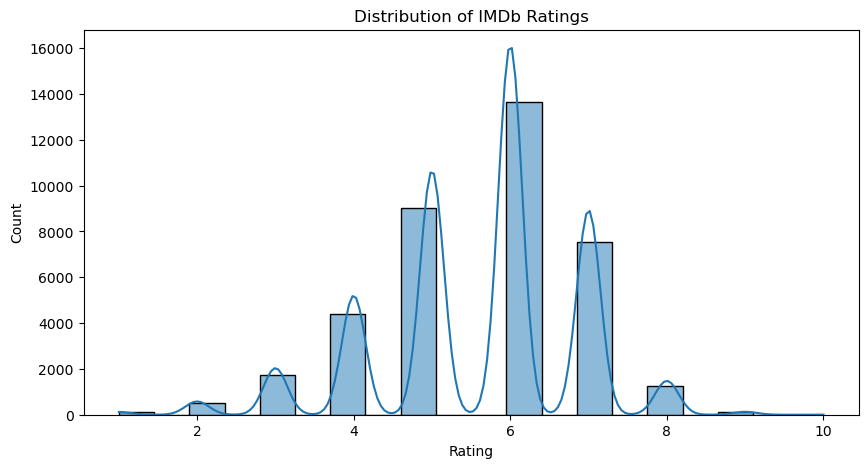

In [157]:
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.show()

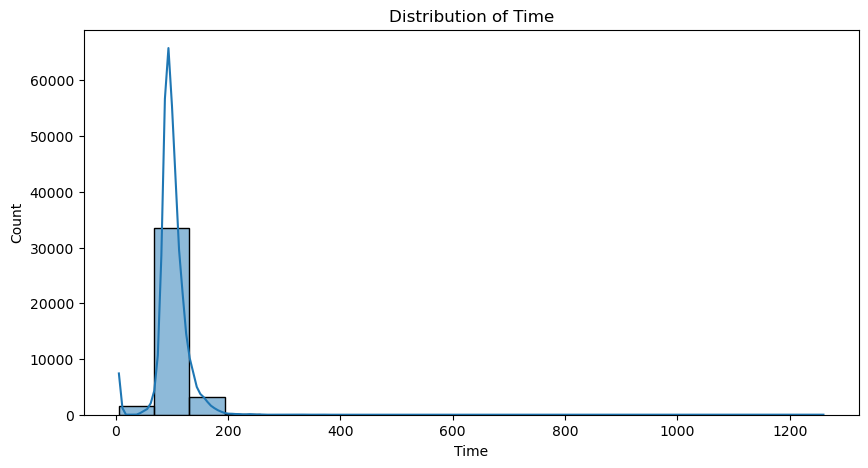

In [158]:
plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=20, kde=True)
plt.title('Distribution of Time')
plt.show()

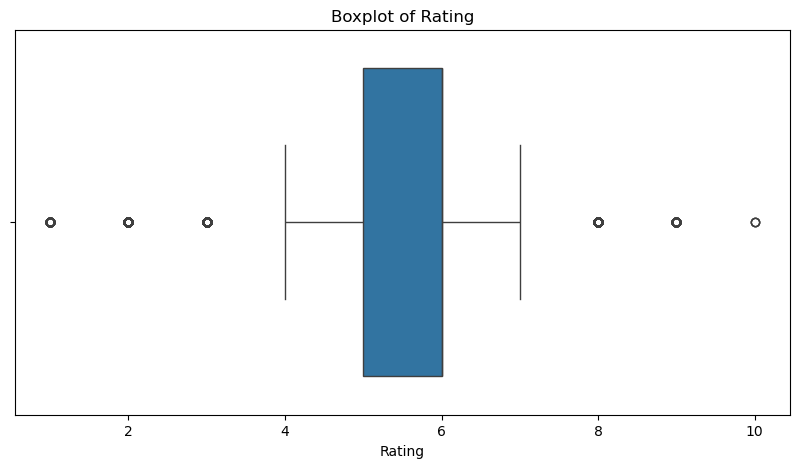

In [179]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Rating')
plt.xlabel('Rating')
plt.show()

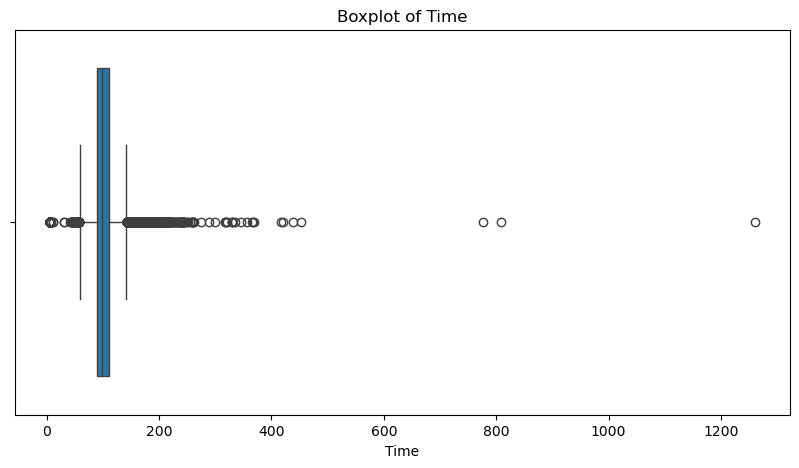

In [160]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Time'])
plt.title('Boxplot of Time')
plt.xlabel('Time')
plt.show()

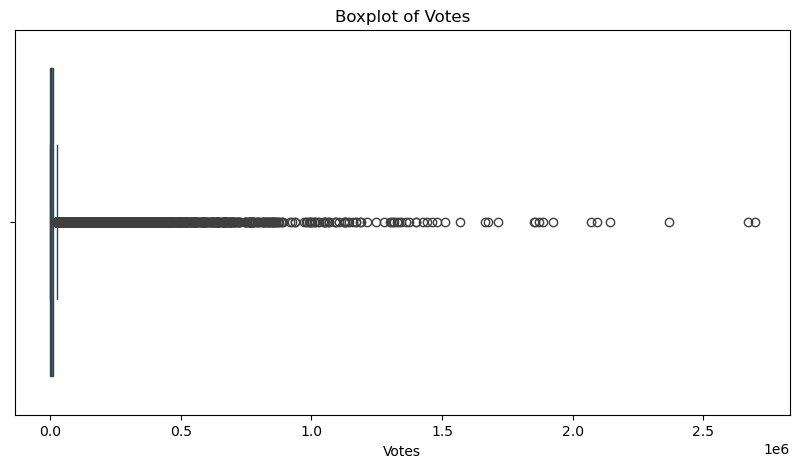

In [161]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Votes'])
plt.title('Boxplot of Votes')
plt.xlabel('Votes')
plt.show()

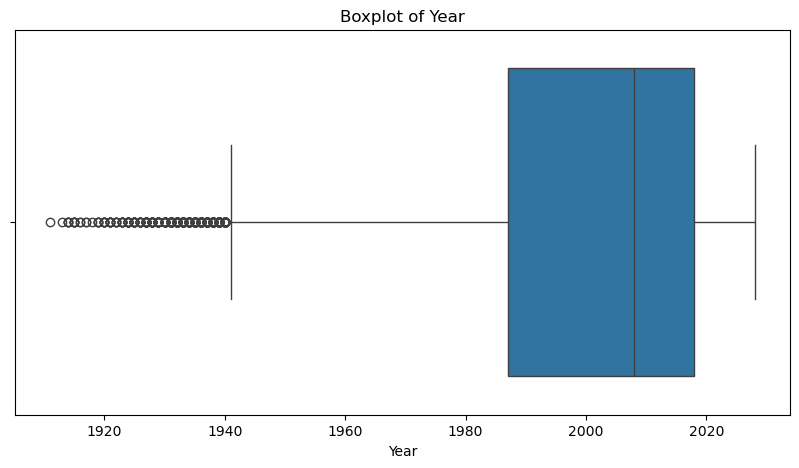

In [177]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Year'])
plt.title('Boxplot of Year')
plt.xlabel('Year')
plt.show()

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38300 entries, 0 to 39997
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        38300 non-null  object
 1   Year         38300 non-null  int32 
 2   certificate  38300 non-null  object
 3   Time         38300 non-null  int32 
 4   genre        38300 non-null  object
 5   Rating       38300 non-null  int32 
 6   Synopsis     38300 non-null  object
 7   Content4     38300 non-null  object
 8   Content6     38300 non-null  object
 9   Votes        38300 non-null  int32 
 10  Gross        38300 non-null  object
 11  genre_list   38300 non-null  object
dtypes: int32(4), object(8)
memory usage: 3.2+ MB


## Outlier Cleaning

In [184]:
# cleaner = OutlierCleaner(df, preserve_index=True)
# cleaned_df, info = cleaner.clean_columns(
#     method='zscore',
#     show_progress=True
# )
# df = cleaned_df

## Encoding

In [187]:
df['genre'].duplicated().sum()

38274

In [189]:
len(df['genre'].unique())

26

In [191]:
# cleaner = OutlierCleaner(df)
# # numerical_features = df.select_dtypes(include=['float64', 'int64', 'int32'])
# df, info = cleaner.clean_columns(
#     # columns = numerical_features,
#     # method = 'zscore',
#     show_progress = True
# )

In [193]:
# cleaner.plot_outlier_analysis()

In [195]:
# cleaner.get_summary_report()

In [197]:
encoder = LabelEncoder()

In [199]:
df.columns

Index(['Title', 'Year', 'certificate', 'Time', 'genre', 'Rating', 'Synopsis',
       'Content4', 'Content6', 'Votes', 'Gross', 'genre_list'],
      dtype='object')

In [201]:
encode_cols = ['Title', 'certificate', 'genre', 'Content4', 'Content6']
for col in encode_cols:
    df[col+'_encoded'] = encoder.fit_transform(df[col])

In [203]:
df

,Title,Year,certificate,Time,genre,Rating,Synopsis,Content4,Content6,Votes,Gross,genre_list,Title_encoded,certificate_encoded,genre_encoded,Content4_encoded,Content6_encoded
0,Avatar: The Way of Water,2022,12A,192,Action,7,\nJake Sully lives with his newfound family fo...,Sam Worthington,Zoe Saldana,280707,0,"[Action, Adventure, Fantasy]",2815,3,0,15307,21526
1,The Menu,2022,15,107,Horror,7,\nA young couple travels to a remote island to...,Ralph Fiennes,Anya Taylor-Joy,211749,0,"[Horror, Thriller]",29401,5,13,14258,1666
2,Babylon,2022,18,189,Comedy,7,\nA tale of outsized ambition and outrageous e...,Brad Pitt,Margot Robbie,47754,0,"[Comedy, Drama, History]",2946,7,5,2242,13033
3,Everything Everywhere All at Once,2022,15,139,Action,8,\nA middle-aged Chinese immigrant is swept up ...,Daniel Scheinert,Michelle Yeoh,315971,0,"[Action, Adventure, Comedy]",8995,5,0,3820,14277
4,M3gan,2022,15,102,Horror,6,\nA robotics engineer at a toy company builds ...,Allison Williams,Violet McGraw,52436,0,"[Horror, Sci-Fi, Thriller]",16204,5,13,718,20749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,Nanga Parbat,2010,Unknown,104,Biography,6,\nDrama about the tragic Nanga Parbat expediti...,Florian Stetter,Andreas Tobias,1876,0,"[Biography, Drama]",18270,36,4,5529,1139
39994,When Men Carried Clubs and Women Played Ding-Dong,1971,Unknown,95,Comedy,4,\nPrehistoric cave-stud Ari wins lovely virgin...,Antonio Sabato,Aldo Giuffrè,177,0,[Comedy],34217,36,5,1364,476
39995,The Bacon Hair,2020,Unknown,76,Animation,8,\nSurrounded by towering walls and patrolled b...,Leah Ashley,Tom Aglio,119,0,"[Animation, Action, Adventure]",25964,36,3,10221,20053
39996,Alexander the Great,1980,12,210,Drama,7,\nA rebel leader calling himself Alexander the...,Omero Antonutti,Eva Kotamanidou,1051,0,"[Drama, History]",1603,2,7,13352,6166


In [205]:
# oneHot = OneHotEncoder()

In [207]:
# nominal_cols = ['genre', 'Content4', 'Content6']

In [209]:
# df[nominal_cols]

In [211]:
# encoder_hot = OneHotEncoder(sparse_output=False)

In [213]:
# encoded_data = encoder_hot.fit_transform(df[nominal_cols])

In [215]:
# encoded_feature_name = encoder_hot.get_feature_names_out(nominal_cols)

In [217]:
final_df = df.select_dtypes(['float64','int32','int64'])
final_df.columns

Index(['Year', 'Time', 'Rating', 'Votes', 'Title_encoded',
       'certificate_encoded', 'genre_encoded', 'Content4_encoded',
       'Content6_encoded'],
      dtype='object')

In [219]:
# nominal_df = pd.DataFrame(encode_cols,columns=encoded_feature_name)
# nominal_df

In [221]:
# df2 = pd.concat([df,nominal_df],axis=1)

In [223]:
df.shape

(38300, 17)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38300 entries, 0 to 39997
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                38300 non-null  object
 1   Year                 38300 non-null  int32 
 2   certificate          38300 non-null  object
 3   Time                 38300 non-null  int32 
 4   genre                38300 non-null  object
 5   Rating               38300 non-null  int32 
 6   Synopsis             38300 non-null  object
 7   Content4             38300 non-null  object
 8   Content6             38300 non-null  object
 9   Votes                38300 non-null  int32 
 10  Gross                38300 non-null  object
 11  genre_list           38300 non-null  object
 12  Title_encoded        38300 non-null  int32 
 13  certificate_encoded  38300 non-null  int32 
 14  genre_encoded        38300 non-null  int32 
 15  Content4_encoded     38300 non-null  int32 
 16  Content6_

In [227]:
# final_df = df2.select_dtypes(['float64'])
# final_df.columns

In [229]:
final_df

,Year,Time,Rating,Votes,Title_encoded,certificate_encoded,genre_encoded,Content4_encoded,Content6_encoded
0,2022,192,7,280707,2815,3,0,15307,21526
1,2022,107,7,211749,29401,5,13,14258,1666
2,2022,189,7,47754,2946,7,5,2242,13033
3,2022,139,8,315971,8995,5,0,3820,14277
4,2022,102,6,52436,16204,5,13,718,20749
...,...,...,...,...,...,...,...,...,...
39993,2010,104,6,1876,18270,36,4,5529,1139
39994,1971,95,4,177,34217,36,5,1364,476
39995,2020,76,8,119,25964,36,3,10221,20053
39996,1980,210,7,1051,1603,2,7,13352,6166


## EDA after encoding

In [232]:
df.describe()

,Year,Time,Rating,Votes,Title_encoded,certificate_encoded,genre_encoded,Content4_encoded,Content6_encoded
count,38300.000000,38300.000000,38300.000000,3.830000e+04,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000
mean,2000.056319,100.827520,5.606815,2.522563e+04,17708.756789,20.044256,5.816397,9300.899582,10840.148433
std,22.471527,27.243948,1.253169,9.257996e+04,10196.532039,14.550868,4.615391,5349.000157,6207.175517
min,1911.000000,6.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,90.000000,5.000000,7.470000e+02,8840.750000,5.000000,3.000000,4652.750000,5479.750000
50%,2008.000000,98.000000,6.000000,2.798000e+03,17755.500000,15.000000,5.000000,9106.000000,10729.500000
75%,2018.000000,111.000000,6.000000,1.097925e+04,26609.000000,36.000000,7.000000,14088.000000,16312.250000
max,2028.000000,1260.000000,10.000000,2.696378e+06,35312.000000,38.000000,25.000000,18575.000000,21602.000000


In [234]:
df.columns

Index(['Title', 'Year', 'certificate', 'Time', 'genre', 'Rating', 'Synopsis',
       'Content4', 'Content6', 'Votes', 'Gross', 'genre_list', 'Title_encoded',
       'certificate_encoded', 'genre_encoded', 'Content4_encoded',
       'Content6_encoded'],
      dtype='object')

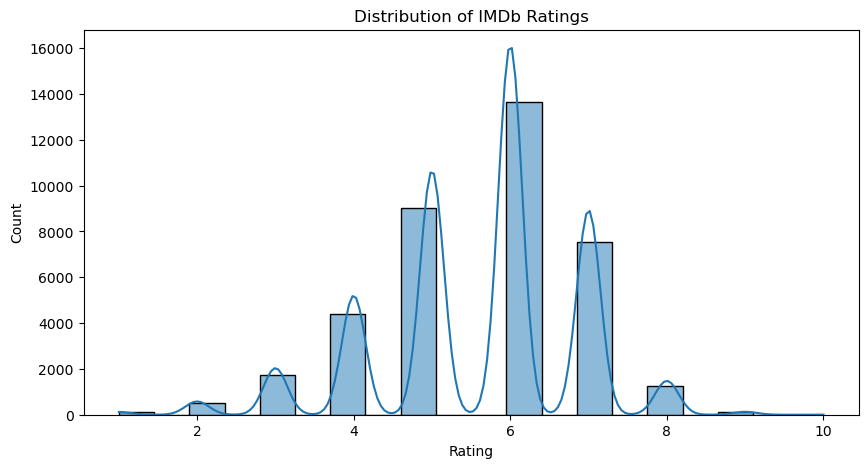

In [236]:
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.show()

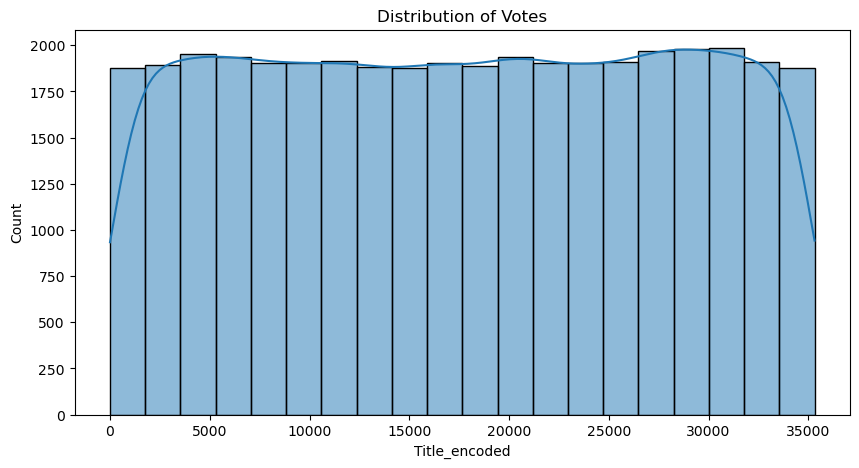

In [237]:
plt.figure(figsize=(10,5))
sns.histplot(df['Title_encoded'], bins=20, kde=True)
plt.title('Distribution of Votes')
plt.show()

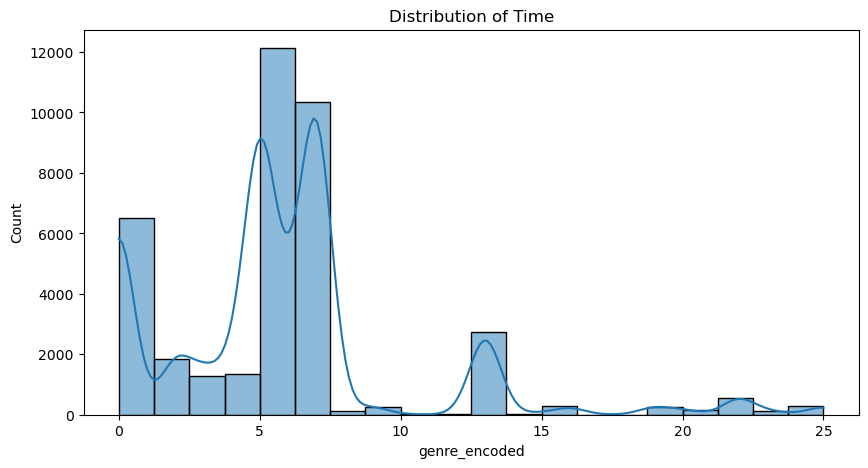

In [239]:
plt.figure(figsize=(10,5))
sns.histplot(df['genre_encoded'], bins=20, kde=True)
plt.title('Distribution of Time')
plt.show()

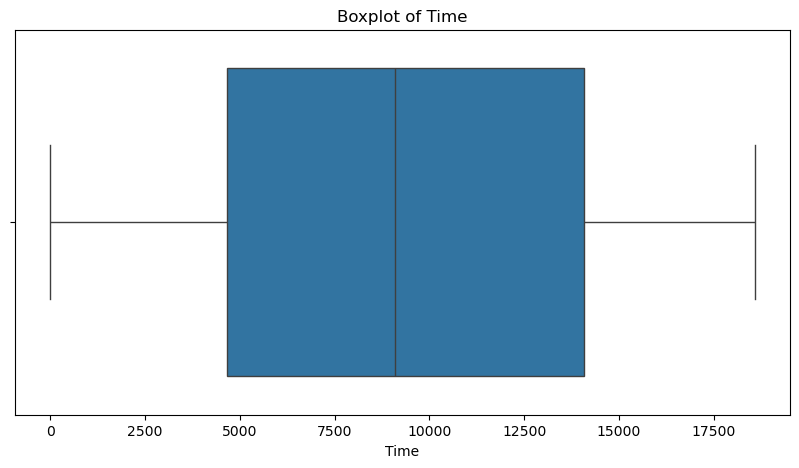

In [241]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Content4_encoded'])
plt.title('Boxplot of Time')
plt.xlabel('Time')
plt.show()

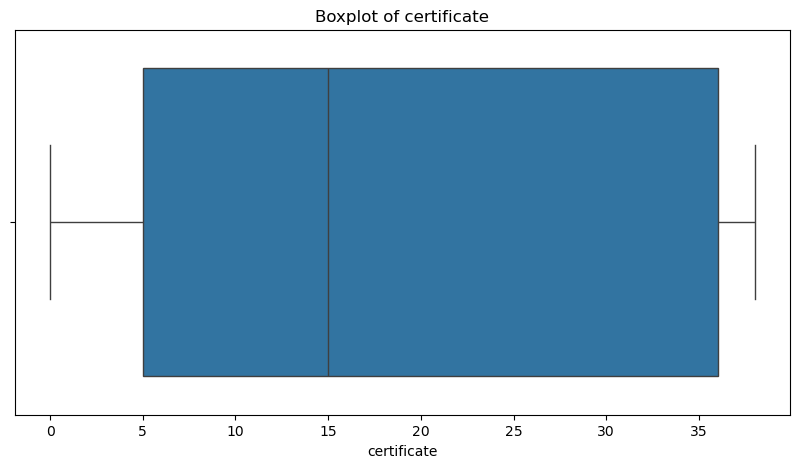

In [242]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['certificate_encoded'])
plt.title('Boxplot of certificate')
plt.xlabel('certificate')
plt.show()

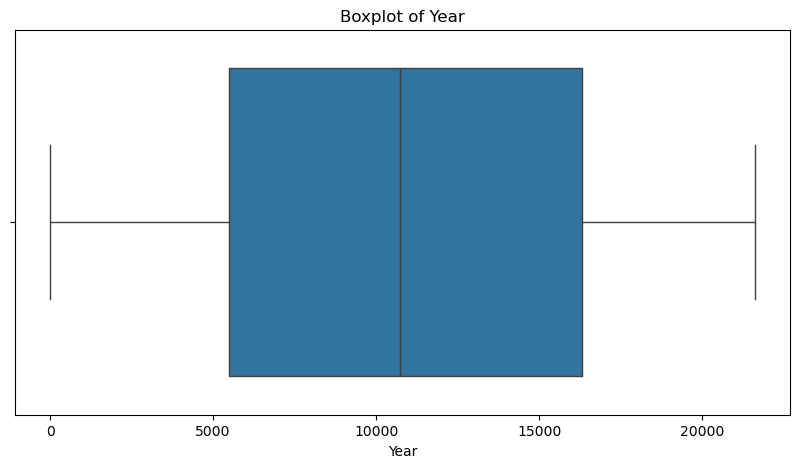

In [245]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Content6_encoded'])
plt.title('Boxplot of Year')
plt.xlabel('Year')
plt.show()

## Cleaning Outlier

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38300 entries, 0 to 39997
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                38300 non-null  object
 1   Year                 38300 non-null  int32 
 2   certificate          38300 non-null  object
 3   Time                 38300 non-null  int32 
 4   genre                38300 non-null  object
 5   Rating               38300 non-null  int32 
 6   Synopsis             38300 non-null  object
 7   Content4             38300 non-null  object
 8   Content6             38300 non-null  object
 9   Votes                38300 non-null  int32 
 10  Gross                38300 non-null  object
 11  genre_list           38300 non-null  object
 12  Title_encoded        38300 non-null  int32 
 13  certificate_encoded  38300 non-null  int32 
 14  genre_encoded        38300 non-null  int32 
 15  Content4_encoded     38300 non-null  int32 
 16  Content6_

In [284]:
cleaner = OutlierCleaner(df)
numerical_features = df.select_dtypes(include=['int32'])
df2, info = cleaner.clean_columns(
    columns = numerical_features,
    # method = 'zscore',
    show_progress = True
)
df2.shape, df.shape


Cleaning columns:   0%|          | 9/38300 [00:00<12:42, 50.19it/s]


((28902, 17), (38300, 17))

## Training Data

In [287]:
df.columns

Index(['Title', 'Year', 'certificate', 'Time', 'genre', 'Rating', 'Synopsis',
       'Content4', 'Content6', 'Votes', 'Gross', 'genre_list', 'Title_encoded',
       'certificate_encoded', 'genre_encoded', 'Content4_encoded',
       'Content6_encoded'],
      dtype='object')

In [406]:
# x = final_df.drop(columns = 'genre_encoded')
# y = final_df['genre_encoded']

In [372]:
df.head()

,Title,Year,certificate,Time,genre,Rating,Synopsis,Content4,Content6,Votes,Gross,genre_list,Title_encoded,certificate_encoded,genre_encoded,Content4_encoded,Content6_encoded
0,Avatar: The Way of Water,2022,12A,192,Action,7,\nJake Sully lives with his newfound family fo...,Sam Worthington,Zoe Saldana,280707,0,"[Action, Adventure, Fantasy]",2815,3,0,15307,21526
1,The Menu,2022,15,107,Horror,7,\nA young couple travels to a remote island to...,Ralph Fiennes,Anya Taylor-Joy,211749,0,"[Horror, Thriller]",29401,5,13,14258,1666
2,Babylon,2022,18,189,Comedy,7,\nA tale of outsized ambition and outrageous e...,Brad Pitt,Margot Robbie,47754,0,"[Comedy, Drama, History]",2946,7,5,2242,13033
3,Everything Everywhere All at Once,2022,15,139,Action,8,\nA middle-aged Chinese immigrant is swept up ...,Daniel Scheinert,Michelle Yeoh,315971,0,"[Action, Adventure, Comedy]",8995,5,0,3820,14277
4,M3gan,2022,15,102,Horror,6,\nA robotics engineer at a toy company builds ...,Allison Williams,Violet McGraw,52436,0,"[Horror, Sci-Fi, Thriller]",16204,5,13,718,20749


In [370]:
x.head()

,Year,Time,Rating,Votes,Title_encoded,certificate_encoded,Content4_encoded,Content6_encoded
0,2022,192,7,280707,2815,3,15307,21526
1,2022,107,7,211749,29401,5,14258,1666
2,2022,189,7,47754,2946,7,2242,13033
3,2022,139,8,315971,8995,5,3820,14277
4,2022,102,6,52436,16204,5,718,20749


In [293]:
y

0         0
1        13
2         5
3         0
4        13
         ..
39993     4
39994     5
39995     3
39996     7
39997     7
Name: genre_encoded, Length: 38300, dtype: int32

In [412]:
df2.head()

,Title,Year,certificate,Time,genre,Rating,Synopsis,Content4,Content6,Votes,Gross,genre_list,Title_encoded,certificate_encoded,genre_encoded,Content4_encoded,Content6_encoded
7,You People,2023,15,117,Comedy,5,"\nFollows a new couple and their families, who...",Jonah Hill,Lauren London,29414,0,"[Comedy, Romance]",34967,5,5,8543,11772
8,Teen Wolf: The Movie,2023,Unknown,140,Action,5,\nA terrifying evil has emerged. The wolves ho...,Tyler Posey,Crystal Reed,7328,0,"[Action, Drama, Fantasy]",25436,36,0,17504,4241
11,Infinity Pool,2023,R,117,Crime,6,\nJames and Em Foster are enjoying an all-incl...,Alexander Skarsgård,Mia Goth,3401,0,"[Crime, Horror, Mystery]",13225,31,6,553,13994
14,The Whale,2022,15,117,Drama,8,"\nA reclusive, morbidly obese English teacher ...",Brendan Fraser,Sadie Sink,22305,0,[Drama],31691,5,7,2299,17830
17,Shotgun Wedding,2022,15,100,Action,5,\nDarcy and Tom gather their families for the ...,Jennifer Lopez,Josh Duhamel,14747,0,"[Action, Comedy, Romance]",23255,5,0,7822,10184


In [374]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [404]:
len(x.columns)

8

In [388]:
transformer = ColumnTransformer(transformers=[
    (StandardScaler(),['Year','Time','Rating','Votes']),
    (LabelEncoder(),['Title', 'certificate', 'genre', 'Content4', 'Content6'])
])

In [394]:
transformer

ColumnTransformer(transformers=[(StandardScaler(),
                                 ['Year', 'Time', 'Rating', 'Votes']),
                                (LabelEncoder(),
                                 ['Title', 'certificate', 'genre', 'Content4',
                                  'Content6'])])

In [392]:
pipeline = Pipeline([
     ('transformer',transformer),
     ('XGB',XGBClassifier())
])

In [396]:
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[(StandardScaler(),
                                                  ['Year', 'Time', 'Rating',
                                                   'Votes']),
                                                 (LabelEncoder(),
                                                  ['Title', 'certificate',
                                                   'genre', 'Content4',
                                                   'Content6'])])),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_ro...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [488]:
pipeline.fit(X_train,y_train)

ValueError: not enough values to unpack (expected 3, got 2)

In [297]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

## Modeling

In [300]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [302]:
models = {
    'Ridge Classifier': RidgeClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNN Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'CatBoost Classifier': CatBoostClassifier(verbose=0),  # Set verbose=0 to suppress output
    'LightGBM Classifier': LGBMClassifier()
}
results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results.append({
        'model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results)
print(results_df)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1352
[LightGBM] [Info] Number of data points in the train set: 30640, number of used features: 8
[LightGBM] [Info] Start training from score -1.761985
[LightGBM] [Info] Start training from score -10.330062
[LightGBM] [Info] Start training from score -3.037044
[LightGBM] [Info] Start training from score -3.384048
[LightGBM] [Info] Start training from score -3.388872
[LightGBM] [Info] Start training from score -1.405938
[LightGBM] [Info] Start training from score -2.654516
[LightGBM] [Info] Start training from score -1.307739
[LightGBM] [Info] Start training from score -5.797462
[LightGBM] [Info] Start training from score -4.992524
[LightGBM] [Info] Start training from score -8.027477
[LightGBM] [Info] Start training from score -10.330062
[LightGBM] [Info] Start training from score -7.439690
[LightGB

In [ ]:
y.unique()

## Hypertuning XGBoost

In [335]:
X = df.drop(columns = 'genre_encoded')
y = df['genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [351]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.7, 1],
    'classifier__colsample_bytree': [0.7, 1]
}

In [353]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=24)),
])

In [355]:
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=None,
    cv=5,
    verbose=2,
)

In [357]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   0.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   0.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   0.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   0.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estima

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
288 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(X

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_po...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__colsample_bytree': [0.7, 1],
                         'classifier__learning_rate': [0.01, 0.1, 0.3],
                         'classifier__max_depth': [3, 6, 10],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.7, 1]},
             scoring='accuracy', verbose=2)

In [359]:
grid_search.best_params_

{'classifier__colsample_bytree': 0.7,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 100,
 'classifier__subsample': 0.7}

In [361]:
grid_search.best_score_

nan

In [363]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [365]:
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.44      0.25      0.32      1258
           2       0.00      0.00      0.00       364
           3       0.68      0.05      0.10       247
           4       0.00      0.00      0.00       315
           5       0.31      0.47      0.38      1886
           6       0.46      0.02      0.04       585
           7       0.36      0.69      0.48      2071
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        40
          10       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.47      0.06      0.10       524
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        52
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00        47
          20       0.00    

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


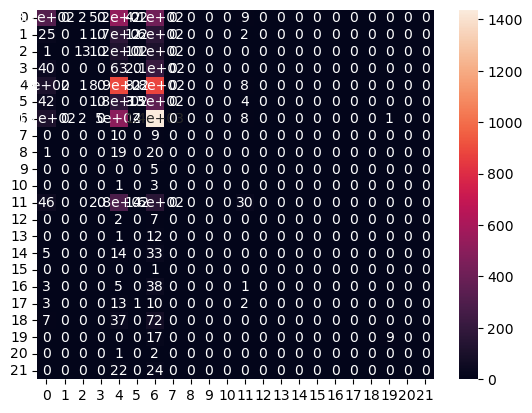

In [367]:
sns.heatmap(confusion_matrix(y_test,y_pred_best),annot=True)
plt.show()

## Modeling

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
dt.tree_.node_count

In [ ]:
dt.tree_.max_depth

In [ ]:
plt.figure(figsize=(20, 15))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

## Modeling

In [ ]:
x = final_df.drop('genre_encoded',axis=1)
y = final_df['genre_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train_scaled,y_train)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_rf))

In [ ]:
plt.figure(figsize=(15, 10))
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True)
plt.show()

## Modeling